In [25]:
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [26]:
start = time.time()

dfTrain = pd.read_csv('../data/TRAIN_TEST_corrected3/train_corrected3.csv')
dfTest = pd.read_csv('../data/TRAIN_TEST_corrected3/test_corrected3.csv')

train = dfTrain.drop(['id', 'price_usd', 'day_created', 'year_created', 'month_created'], axis=1)
target = dfTrain.price_usd
scaler = StandardScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)

test = dfTest.drop(['id', 'day_created', 'year_created', 'month_created'], axis=1)
test = pd.DataFrame(scaler.transform(test), columns=test.columns)
test_ids = dfTest.id

In [27]:
train.head(3)

,distance_to_obelisco_mtrs,lat,lon,surface_total_in_m2,rooms,PH,apartment,house,store,entorno_score
0,-0.254778,-0.257360,0.179151,-0.355479,0.566074,-0.253632,0.851851,-0.725942,-0.123193,-0.638058
1,-0.260130,-0.257184,0.189939,-0.397511,-0.346374,-0.253632,0.851851,-0.725942,-0.123193,1.418856
2,-0.238270,-0.257482,0.145996,-0.149989,-0.346374,-0.253632,-1.173914,1.377521,-0.123193,-0.638058


In [28]:
test.head(3)

,distance_to_obelisco_mtrs,lat,lon,surface_total_in_m2,rooms,PH,apartment,house,store,entorno_score
0,-0.261765,-0.258032,0.196455,-0.500257,0.566074,-0.253632,0.851851,-0.725942,-0.123193,-0.255570
1,4.825094,4.239091,6.344510,-0.500257,-0.346374,-0.253632,0.851851,-0.725942,-0.123193,-0.638058
2,-0.261095,-0.256695,0.192219,-0.376495,0.566074,-0.253632,0.851851,-0.725942,-0.123193,1.519325


In [29]:
params = {'n_estimators': 400, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls', 'random_state':13}

GBR = GradientBoostingRegressor(**params)

In [30]:
GBR.fit(train, target)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=13,
             subsample=1.0, verbose=0, warm_start=False)

In [31]:
predictions = GBR.predict(test)

In [32]:
result = pd.DataFrame({'id':test_ids, 'price_usd':predictions})

In [33]:
result.head()

,id,price_usd
0,3632,215075.622410
1,3633,143932.209691
2,2263404,142240.909462
3,2263405,114734.341752
4,2263406,115111.517819


In [34]:
feature_importance = GBR.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
result = pd.DataFrame({'features':train.columns, 
                       'importance':feature_importance}).sort_values(by='importance', ascending=False)

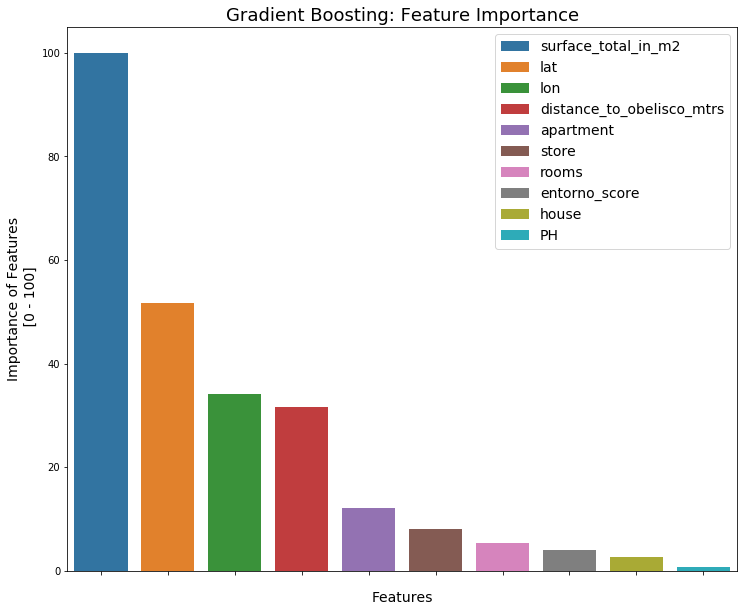

In [35]:
ax = sns.barplot(data=result, x='features', y='importance', hue='features');
ax.set_title("Gradient Boosting: Feature Importance", fontsize=18)
ax.legend(fontsize=14)
leg = ax.get_legend()

ax = sns.barplot(data=result, x='features', y='importance');
ax.legend = leg
ax.tick_params(axis='x', which='both', labelbottom='off')
ax.get_figure().set_figwidth(12)
ax.get_figure().set_figheight(10)
ax.set_title("Gradient Boosting: Feature Importance", fontsize=18)
ax.set_xlabel("\nFeatures", fontsize=14);
ax.set_ylabel("Importance of Features\n [0 - 100]", fontsize=14);

In [36]:
end = time.time()
m, s = divmod(end - start, 60)
h, m = divmod(m, 60)
print "Finalizó!"
print 'Tiempo:', "%02d:%02d:%02d" % (h, m, s)

Finalizó!
Tiempo: 00:09:39
